In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [5]:
np.random.seed(5) #1 also interesting
X = pd.DataFrame({'var1': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10)), 
                  'var2': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10))})
y = pd.DataFrame({'Class': np.append(np.ones(10),np.zeros(10))}).Class

In [42]:
def run_ML_process(X, y, clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, stratify=y) 
    
    plot_step = 0.02
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1.2
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1.2
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Evaluation using a 10-fold CV
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot confussion matrix
    plot_confusion_matrix(clf, X_test, y_test, ax = axs[0])
    
    #Plot decisionfuctions and data points & predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.25, c=y_train, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], alpha=0.25, c=y_test, cmap=ListedColormap(['grey','red']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['grey','red']))


Averace Accuracy: 0.9


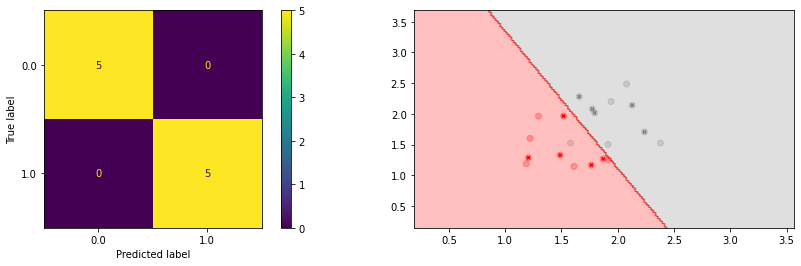

In [18]:
run_ML_process(X, y, SVC(kernel='linear'))
#I don't know why but the 2 graphs below does not correspond

In [24]:
def run_ML_process(X, y, clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, stratify=y) 
    
    plot_step = 0.01
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1.2
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1.2
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Evaluation using a 10-fold CV
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot confussion matrix
    plot_confusion_matrix(clf, X, y, ax = axs[0])
    
    #Plot decisionfuctions and data points & predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.25, c=y_train, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], alpha=0.25, c=y_test, cmap=ListedColormap(['grey','red']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['grey','red']))


Averace Accuracy: 0.9


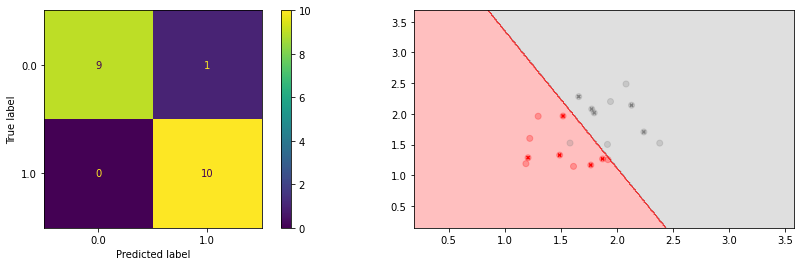

In [25]:
run_ML_process(X, y, SVC(kernel='linear'))
#I don't know why but the 2 graphs below does not correspond

In [ ]:
#We can increase the dimensions of the dataset by creating new variables: x, y
# -> create x^2

#kernel=linear -> the vector is 2D
#because the vectore could be in 3D

Averace Accuracy: 0.85


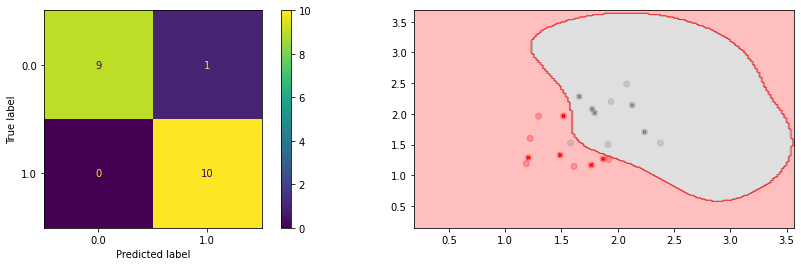

In [23]:
run_ML_process(X, y, SVC())
#the plot on the right was by breaking down the plane into pixels
#and then check whether that pixel is 0 or 1 (check again)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

Averace Accuracy: 0.9


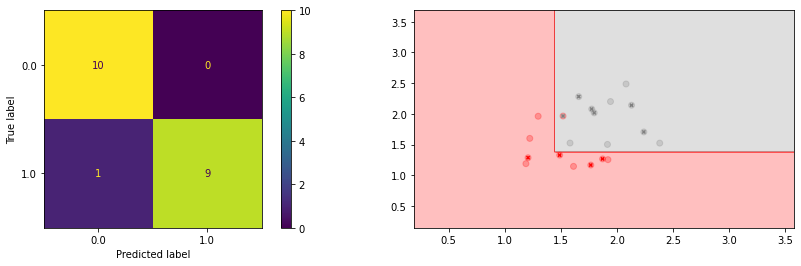

In [34]:
run_ML_process(X, y, DecisionTreeClassifier(max_depth=20))

Averace Accuracy: 0.85


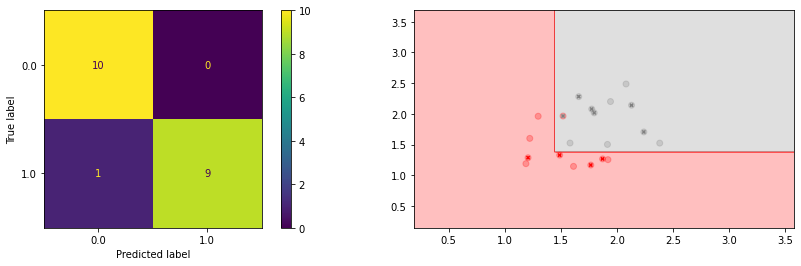

In [36]:
run_ML_process(X, y, DecisionTreeClassifier())

In [37]:
from sklearn.ensemble import RandomForestClassifier

Averace Accuracy: 0.9


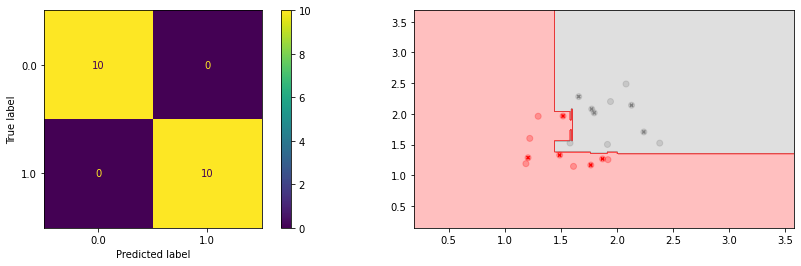

In [38]:
run_ML_process(X, y, RandomForestClassifier())

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Averace Accuracy: 0.8


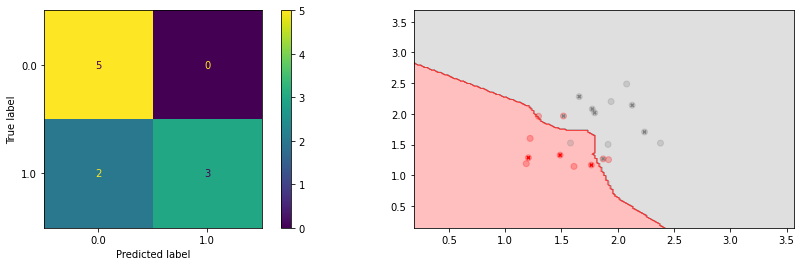

In [43]:
run_ML_process(X, y, KNeighborsClassifier())
#the same family with kNN Imputation

Averace Accuracy: 0.9


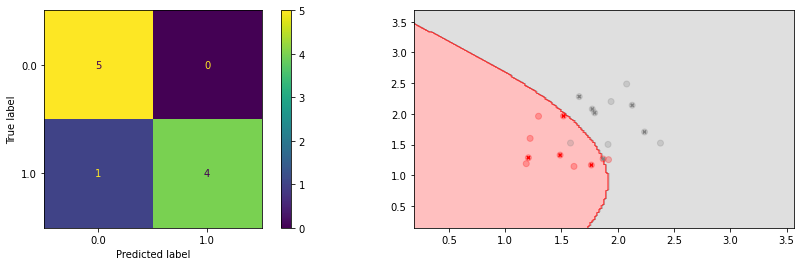

In [44]:
run_ML_process(X, y, GaussianNB())

Averace Accuracy: 0.85


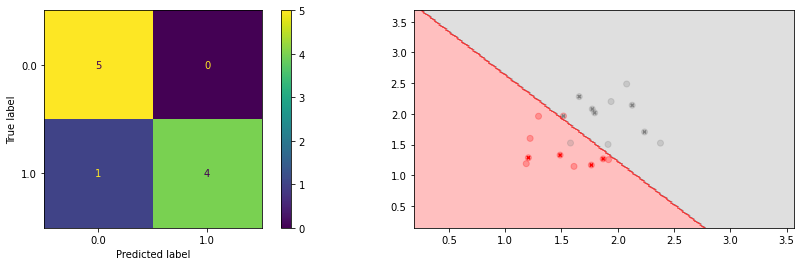

In [45]:
run_ML_process(X, y, LogisticRegression())

In [46]:
from sklearn.neural_network import MLPClassifier

Averace Accuracy: 0.9


/usr/local/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


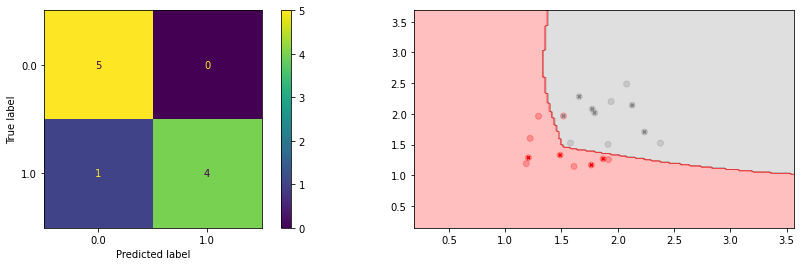

In [47]:
run_ML_process(X, y, MLPClassifier(max_iter=2000))

Averace Accuracy: 0.9


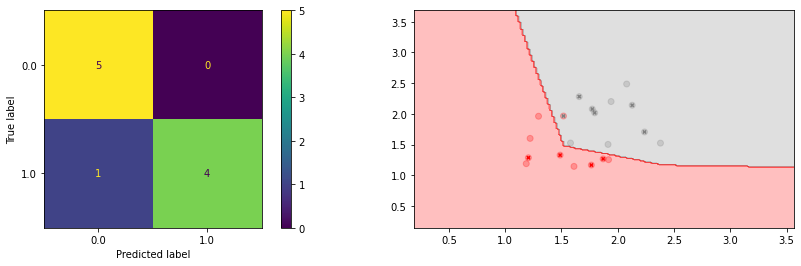

In [49]:
run_ML_process(X, y, MLPClassifier(max_iter=100000))